In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, gzip, pyarrow.parquet

print(pd.io.parquet.get_engine('auto')) 

from sklearn.preprocessing import MinMaxScaler

# Local_google_drive = "/Users/siavash/Library/CloudStorage/GoogleDrive-siavash.jafarizadeh@gmail.com/.shortcut-targets-by-id/1BA94HYNI6NLWOcU5Ts7Nfso4uuVjrDwp/deeplearning2026"

df = pd.read_parquet('FNDDSeverything.parquet.gzip')

In [29]:
Col_obj = df.select_dtypes(include='str').columns
Col_num = df.select_dtypes(exclude='str').columns


In [30]:
df.info()
df.describe().T

<class 'pandas.DataFrame'>
RangeIndex: 480176 entries, 0 to 480175
Data columns (total 92 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   description       480176 non-null  str    
 1   ALA_G             2408 non-null    float64
 2   ARA_G             154 non-null     float64
 3   B12_UG            22124 non-null   float64
 4   B1_MG             25807 non-null   float64
 5   B2_MG             38109 non-null   float64
 6   B3_MG             41473 non-null   float64
 7   B5_MG             13908 non-null   float64
 8   B6_MG             31844 non-null   float64
 9   B7_UG             1348 non-null    float64
 10  B9_UG             26260 non-null   float64
 11  B_UG              822 non-null     float64
 12  CHO1_G            436060 non-null  float64
 13  CHOfiber1_G       270661 non-null  float64
 14  CHOstarch_G       1975 non-null    float64
 15  CHOsugar_G        696 non-null     float64
 16  Ca_MG             303735 non-nu

,count,mean,std,min,25%,50%,75%,max
nameunit,,,,,,,,
ALA_G,2408.0,0.301425,1.799161e+00,0.000625,0.020,0.062,0.16600,5.336800e+01
ARA_G,154.0,0.046617,7.008372e-02,0.010000,0.021,0.027,0.03775,6.700000e-01
B12_UG,22124.0,5229.231781,5.506360e+05,0.010000,0.400,1.250,3.21000,6.578947e+07
B1_MG,25807.0,1.308096,2.436766e+01,0.001000,0.083,1.000,1.00000,3.000000e+03
B2_MG,38109.0,1.166698,1.038360e+02,0.001000,0.131,0.260,0.45500,2.000000e+04
...,...,...,...,...,...,...,...,...
valine_G,5227.0,3.365094,1.086277e+02,0.002000,0.260,0.790,1.20550,5.110714e+03
vit_a_IU,103512.0,21585.275620,2.723966e+06,1.000000,208.000,411.000,1029.00000,8.000000e+08
vit_c_MG,102033.0,52.168800,1.149618e+03,0.010000,2.700,7.500,21.40000,2.100000e+05


In [31]:
def min_max_scale(col):
    return (col - col.min()) / (col.max() - col.min())

DD = df[Col_num].fillna(0, inplace=True)
D = df[Col_num].apply(min_max_scale, axis=0)



/var/folders/zb/s9y25xv57sd631cqzphbhf4r0000gn/T/ipykernel_90734/613615228.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  DD = df[Col_num].fillna(0, inplace=True)


/var/folders/zb/s9y25xv57sd631cqzphbhf4r0000gn/T/ipykernel_90734/2484682426.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 3, figsize=(12,6))


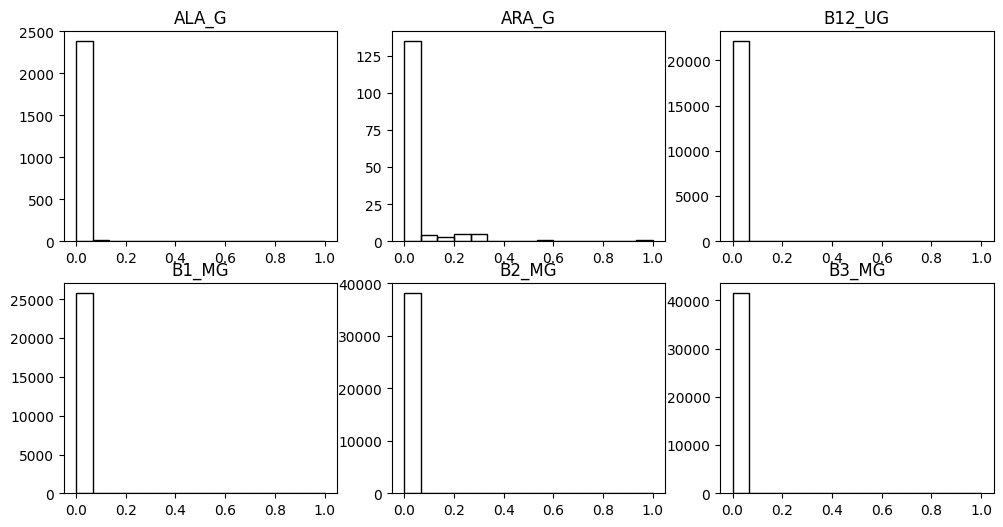

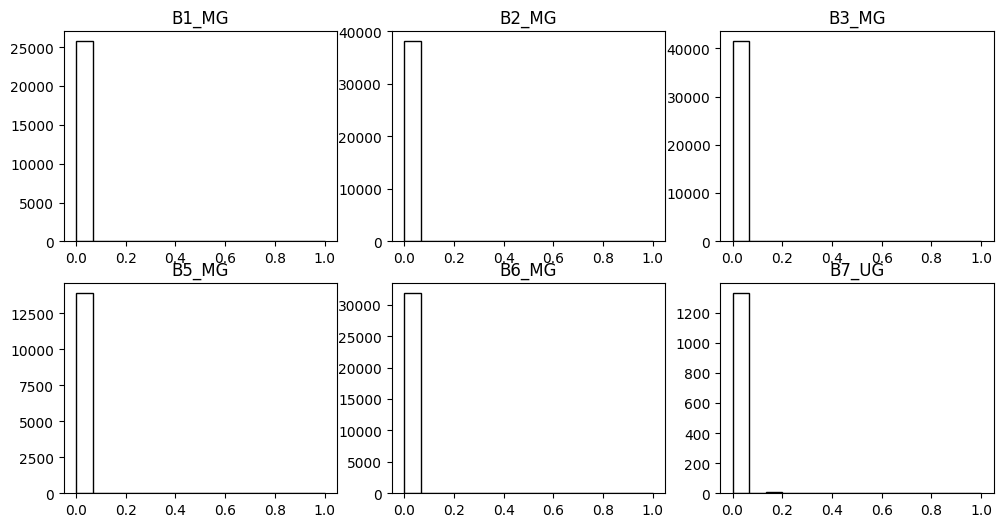

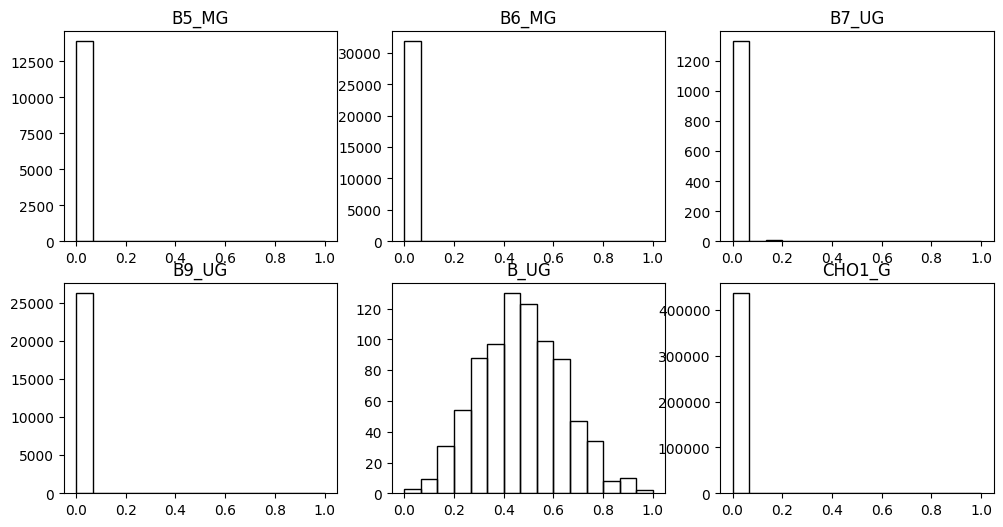

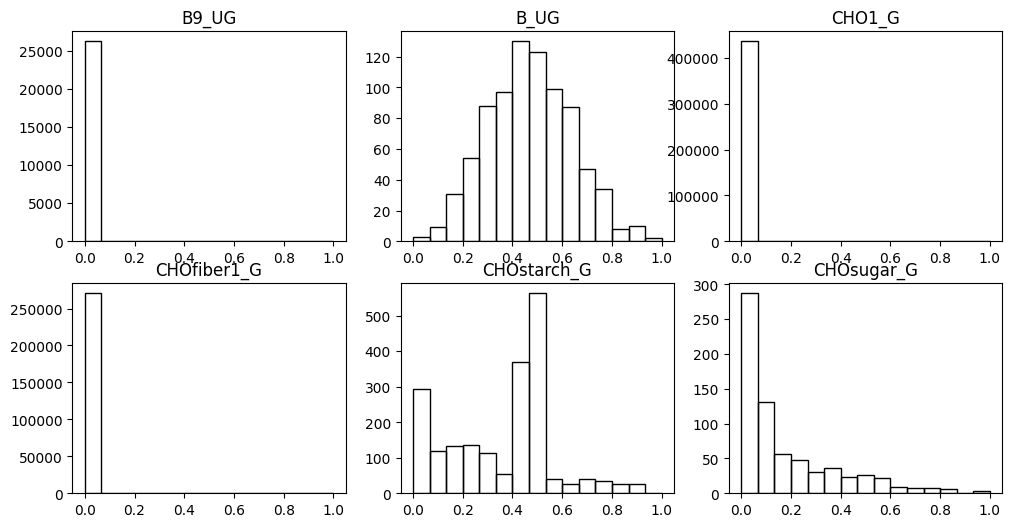

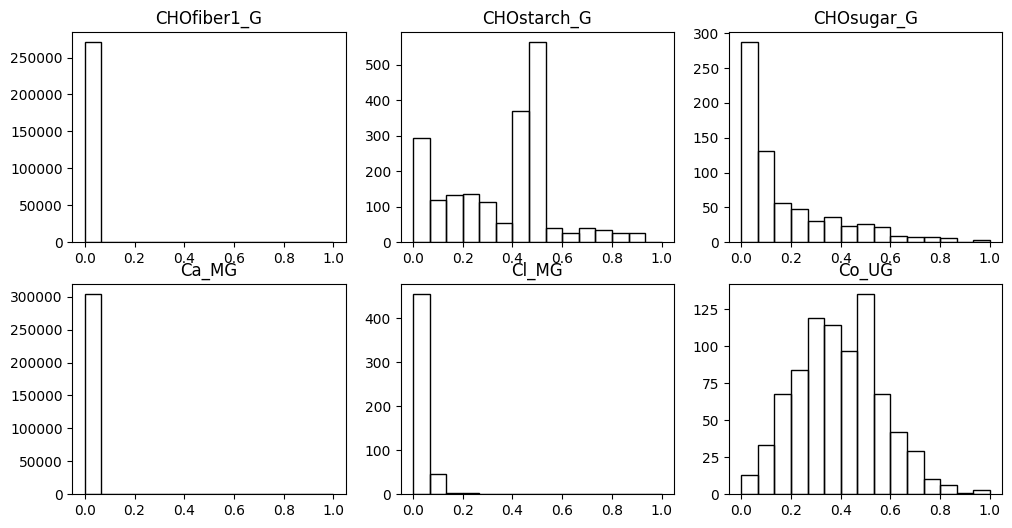

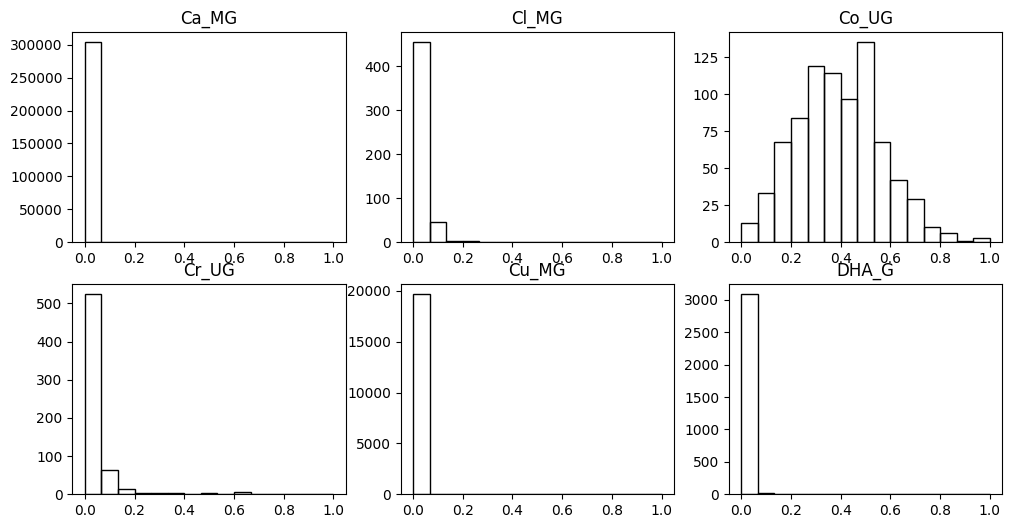

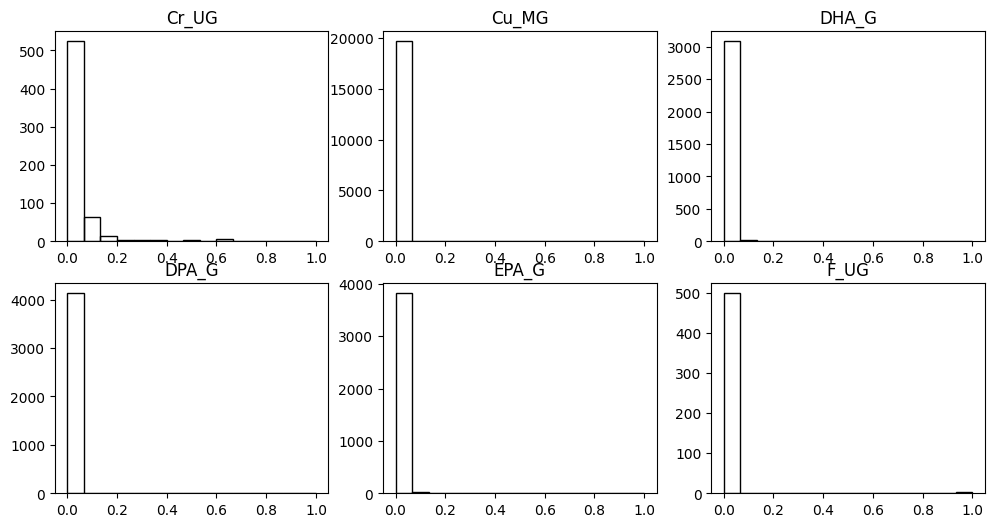

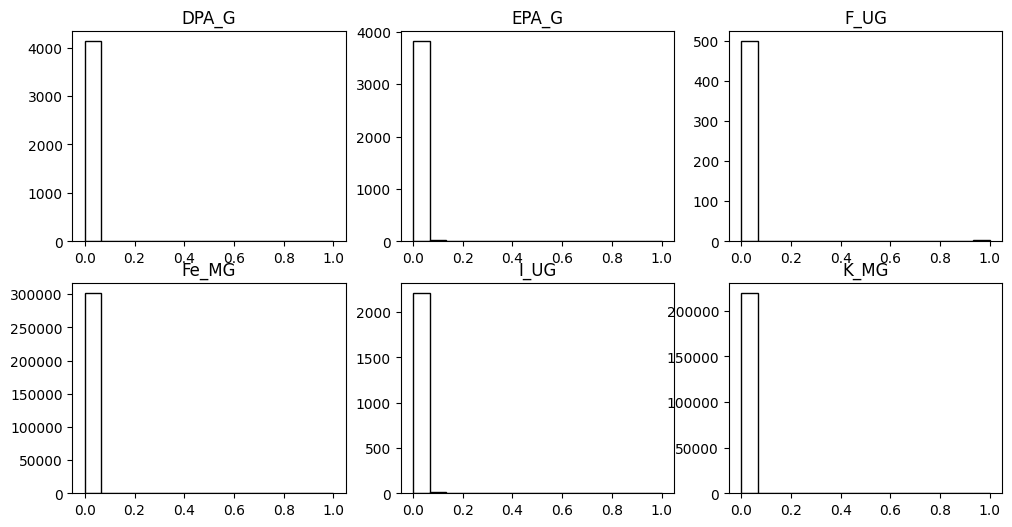

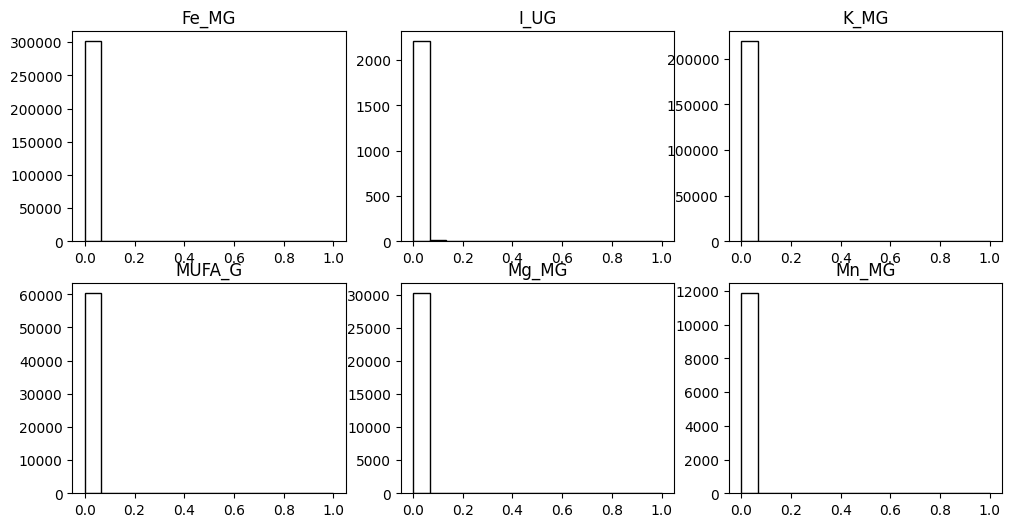

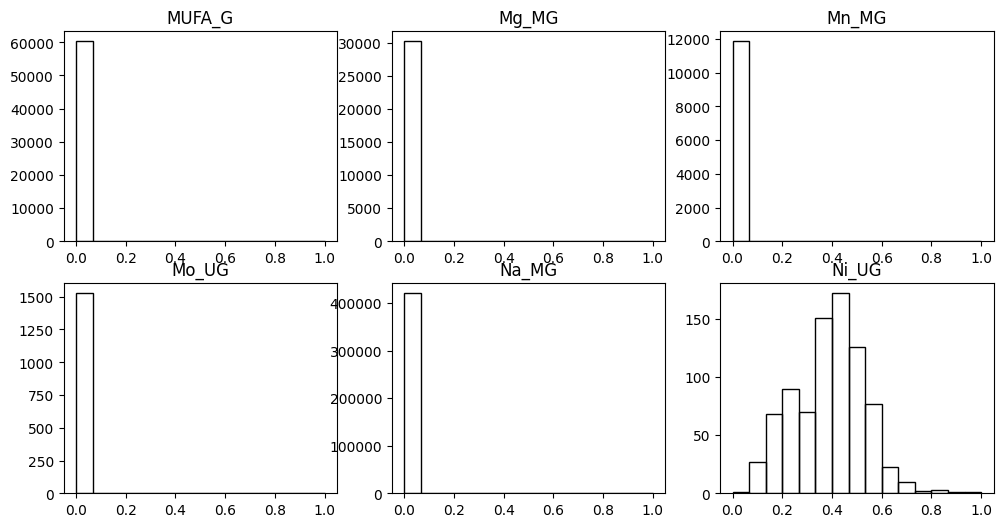

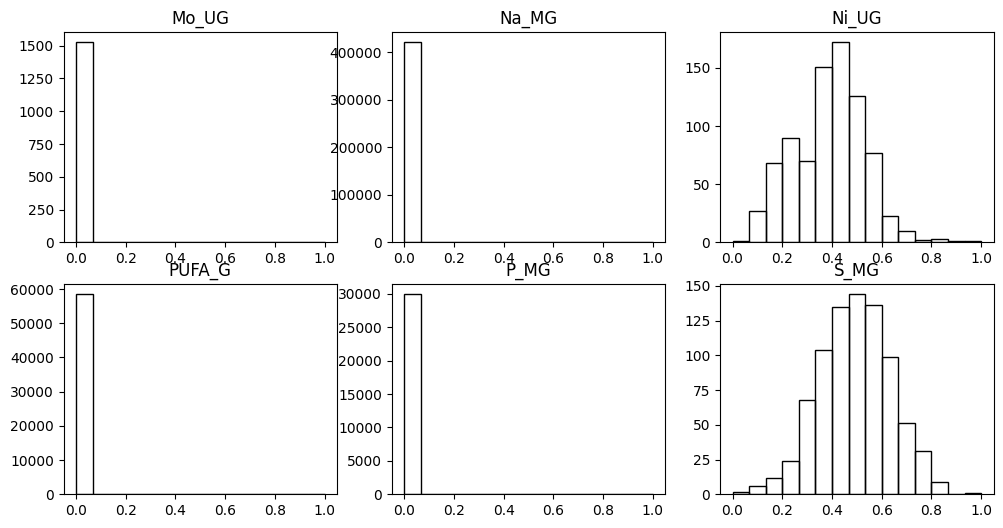

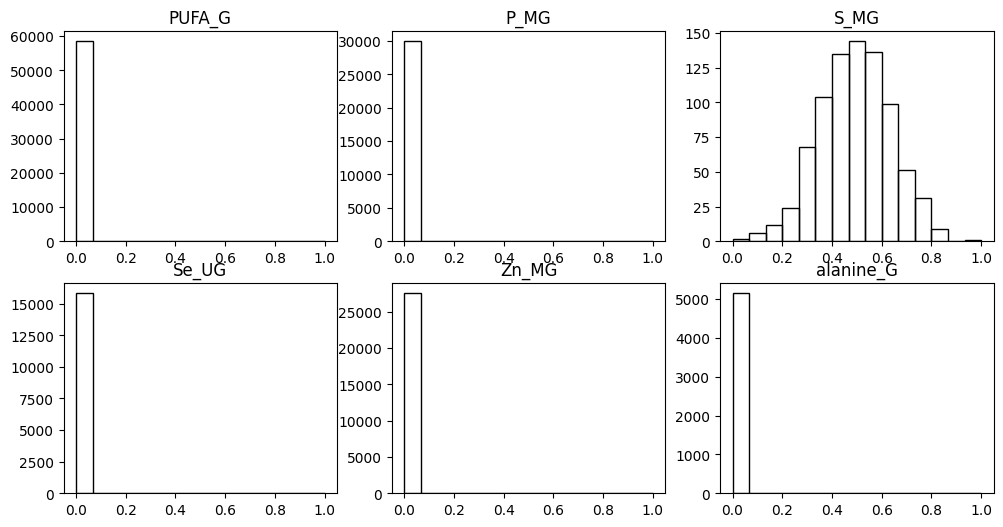

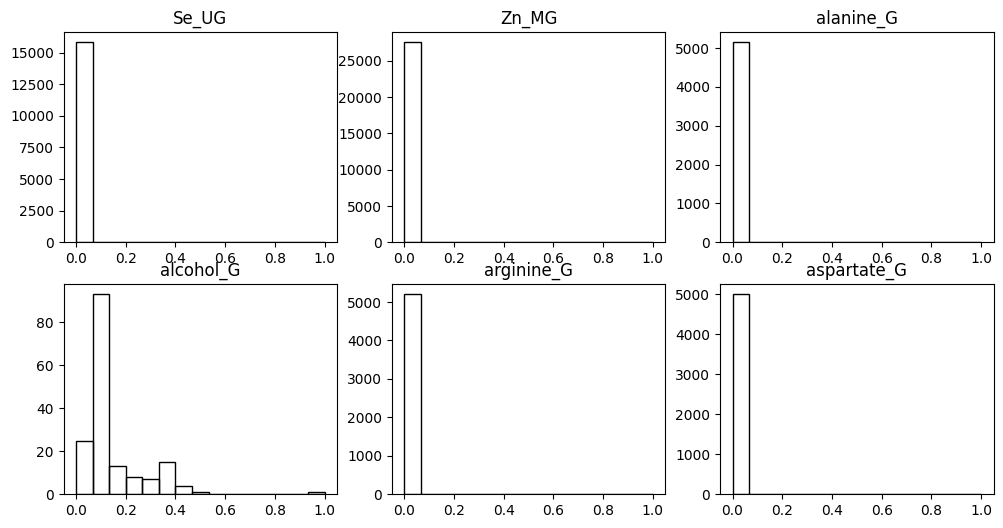

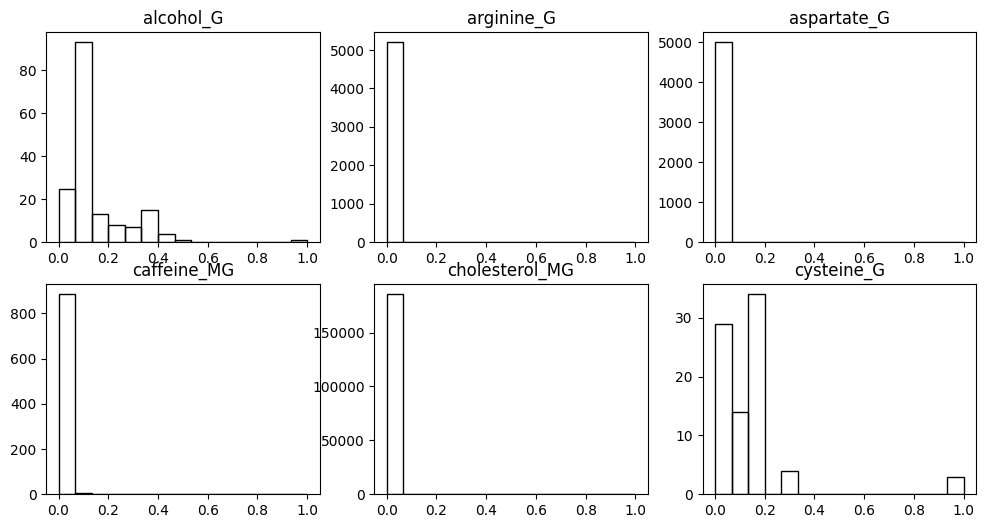

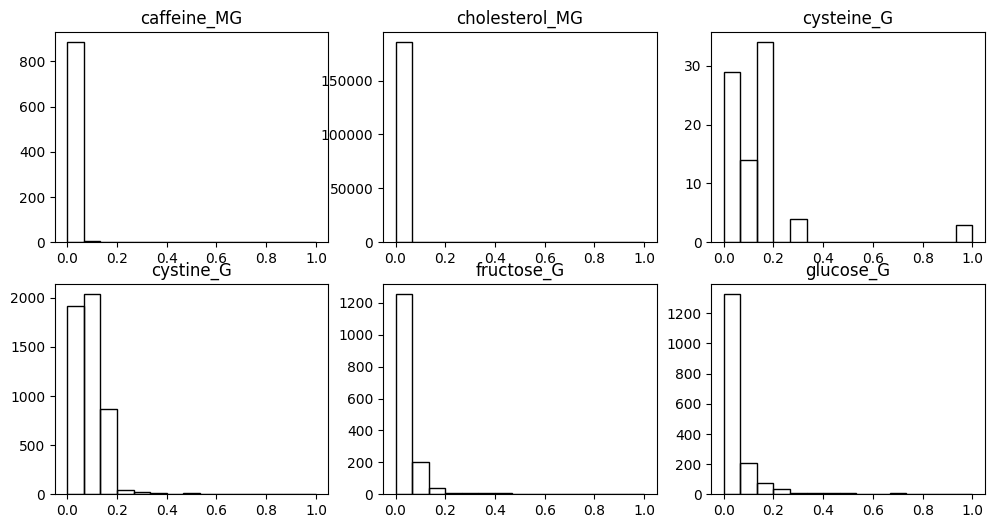

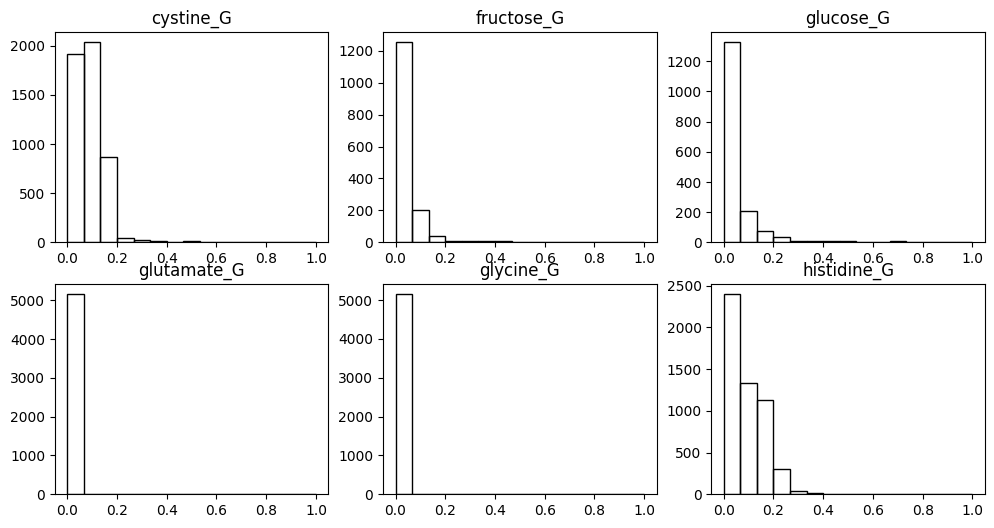

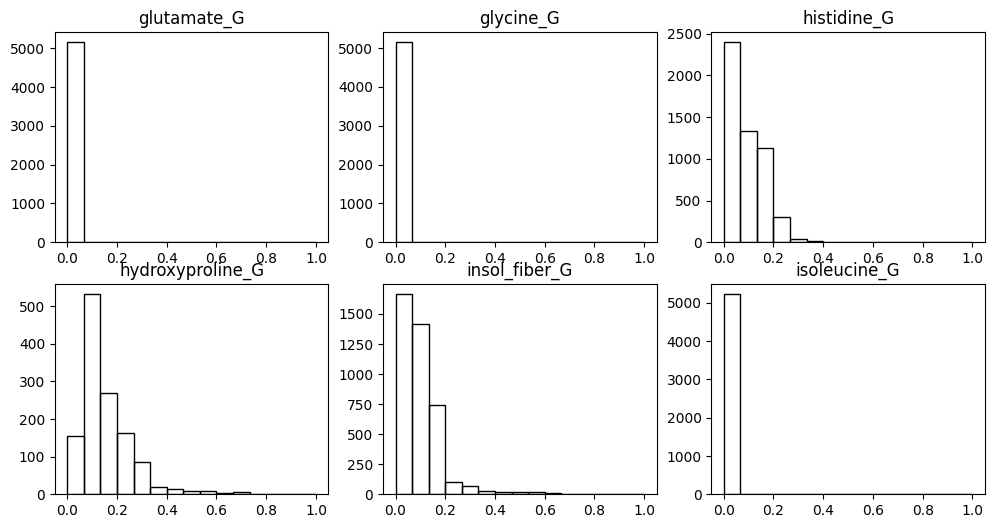

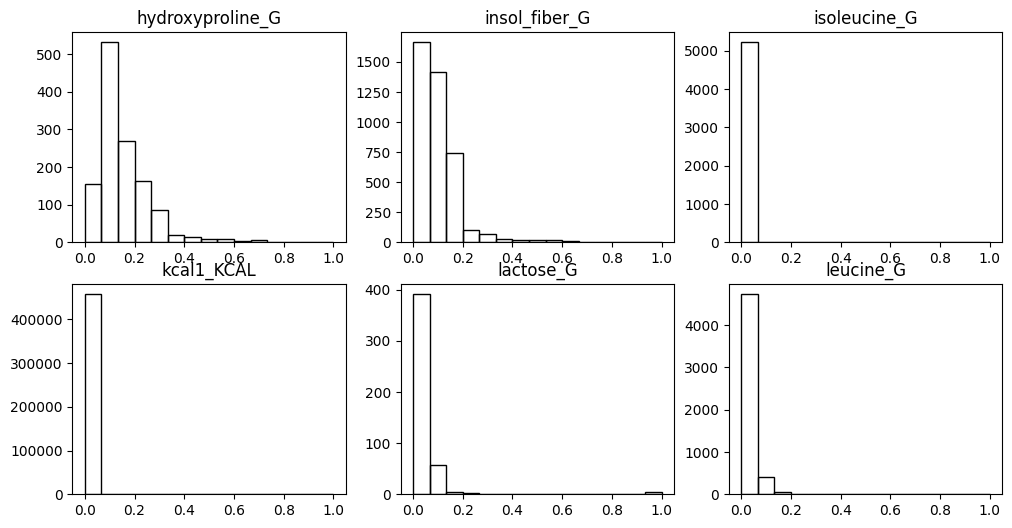

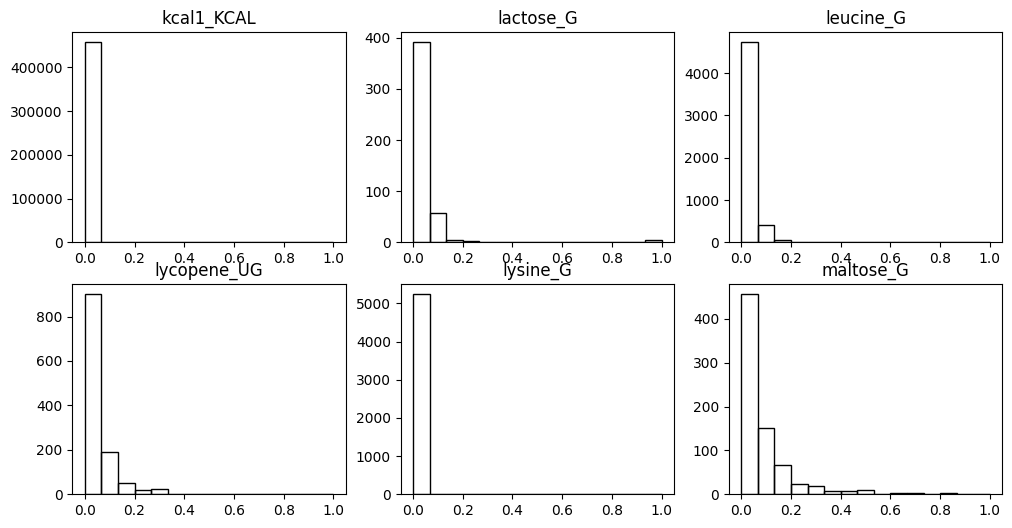

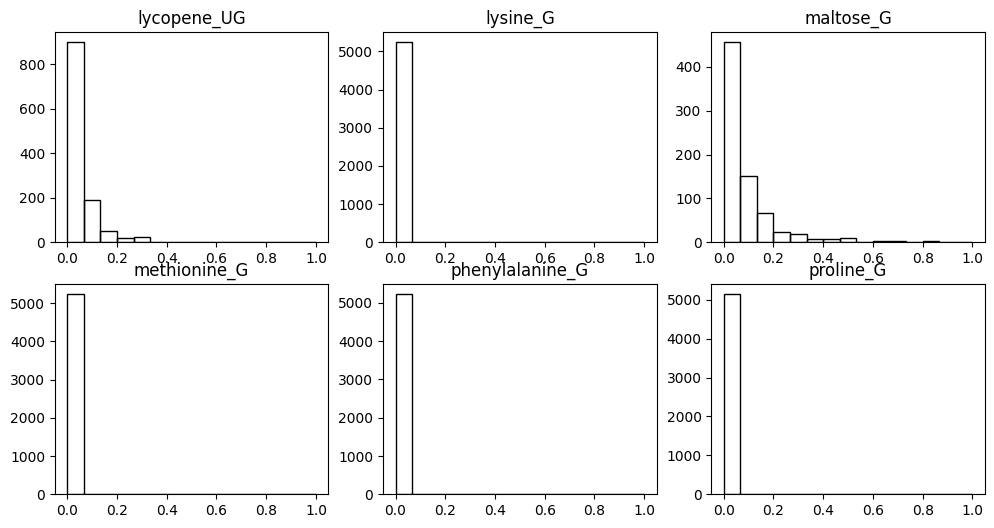

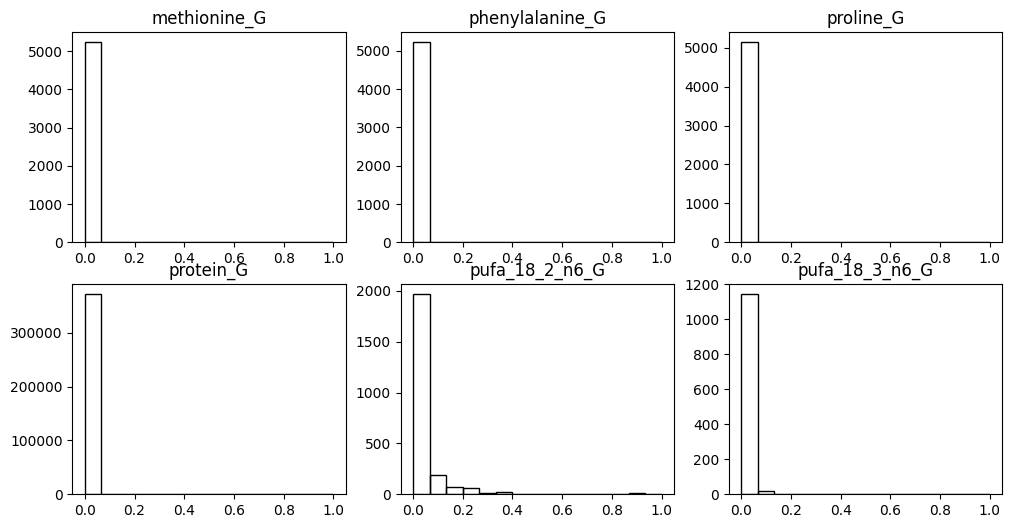

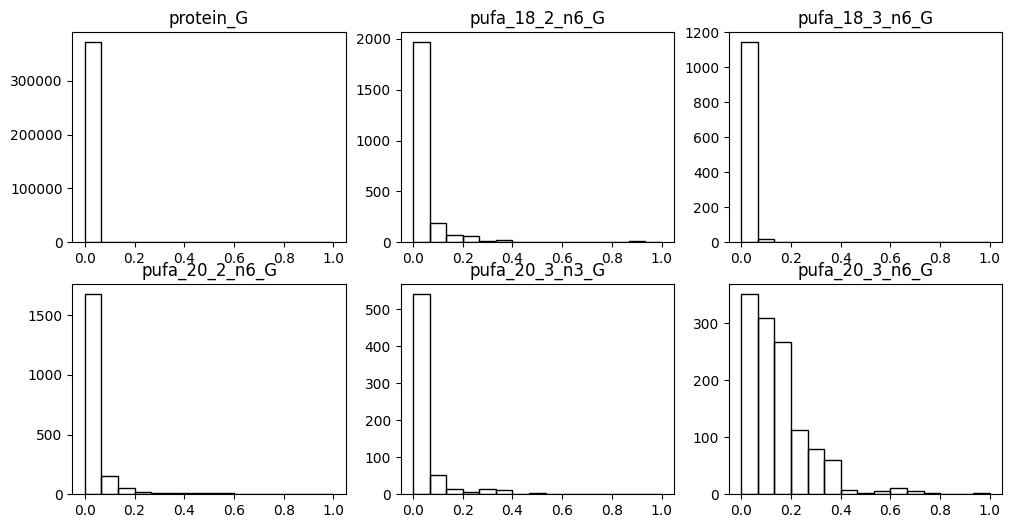

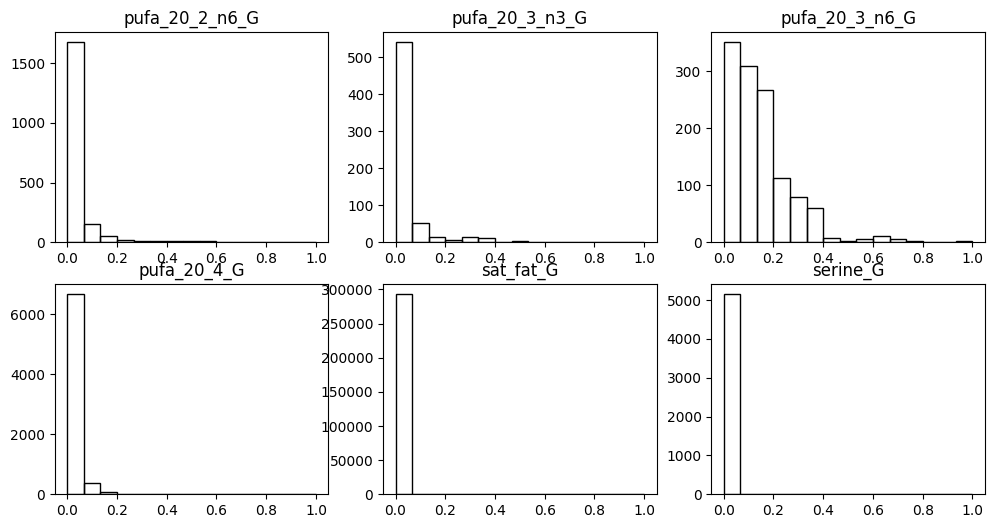

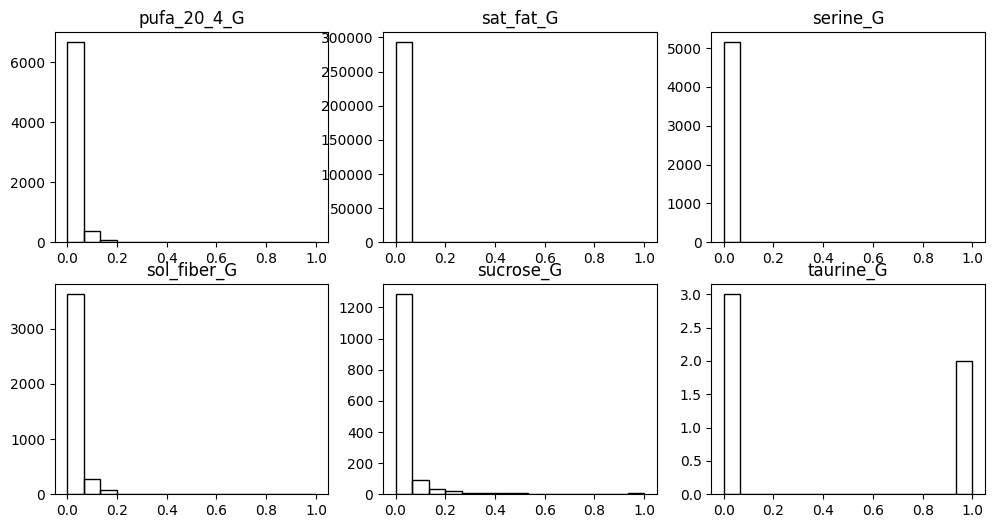

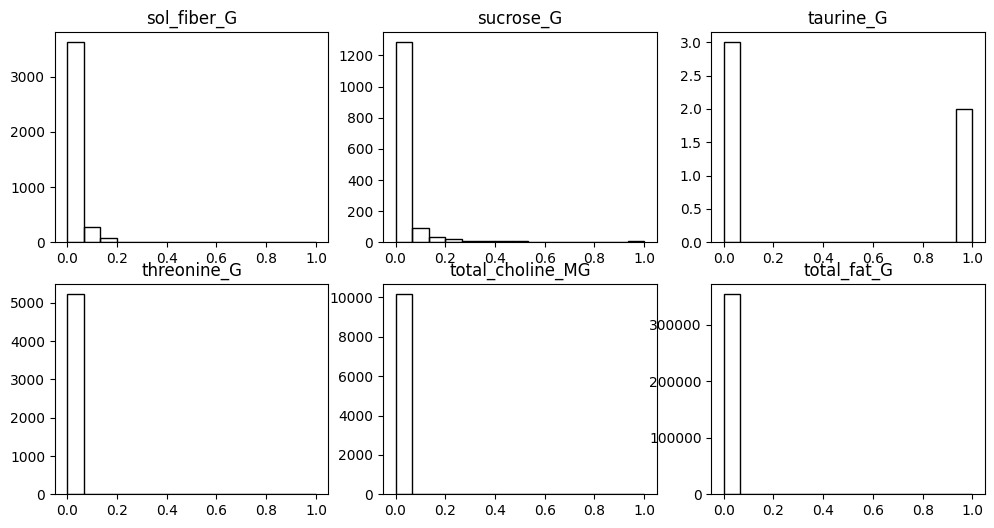

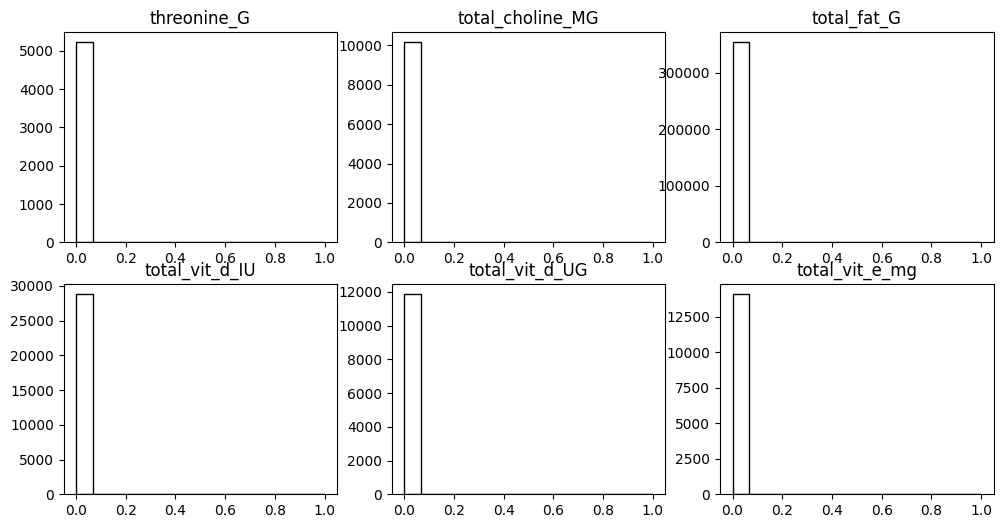

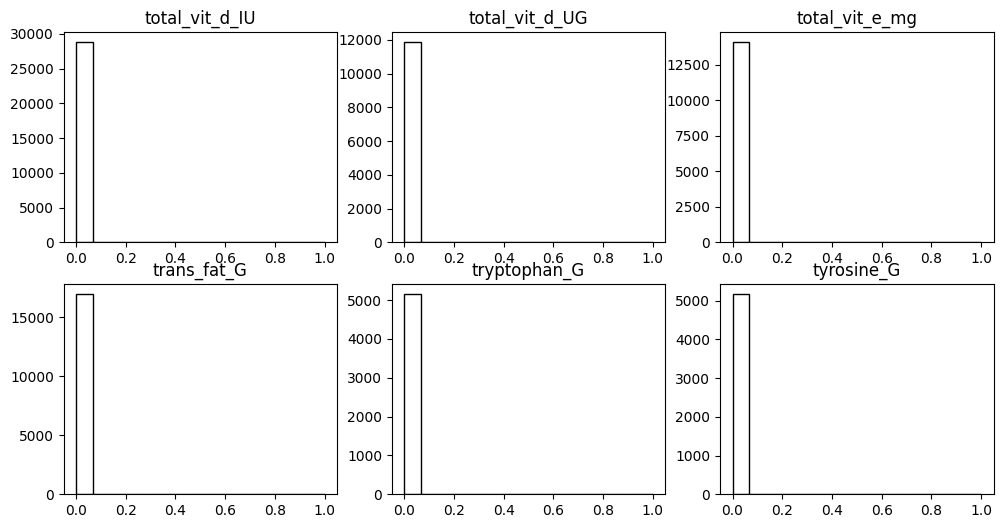

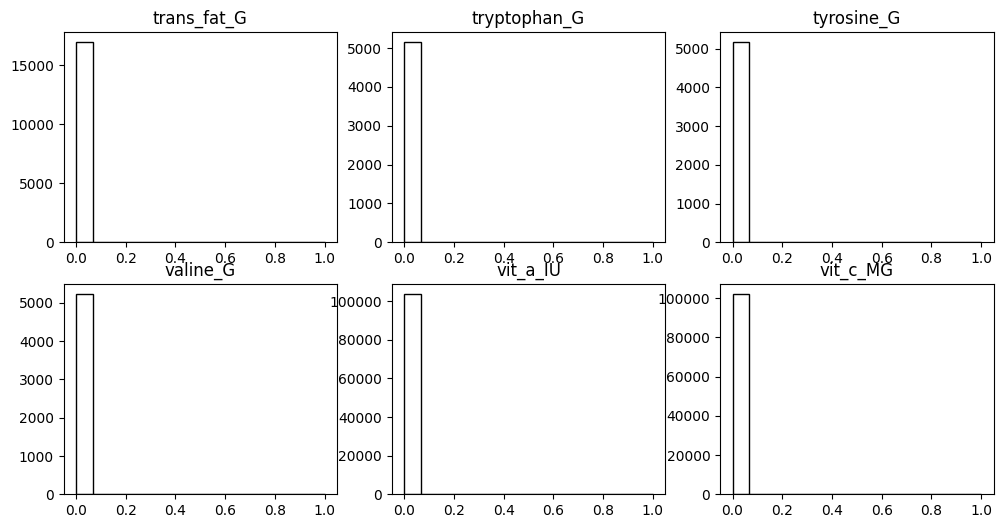

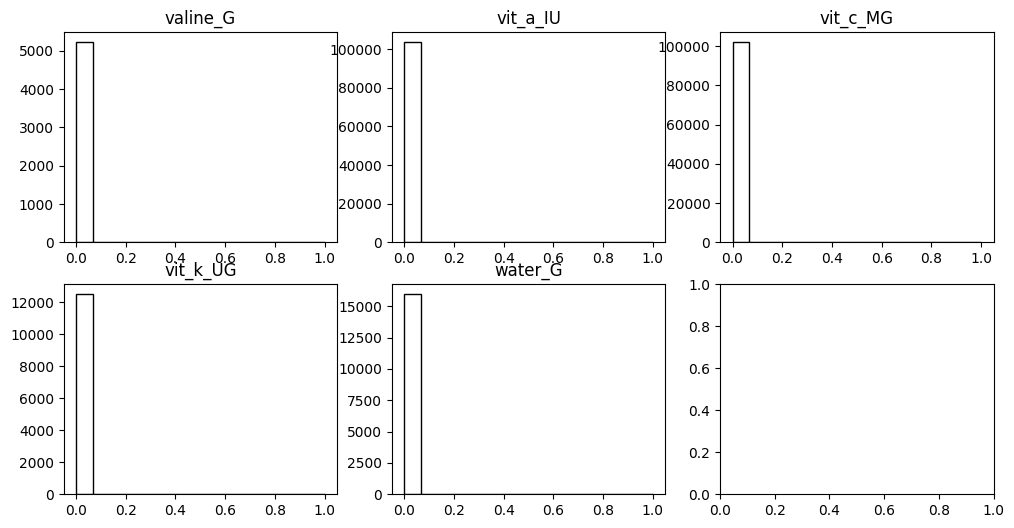

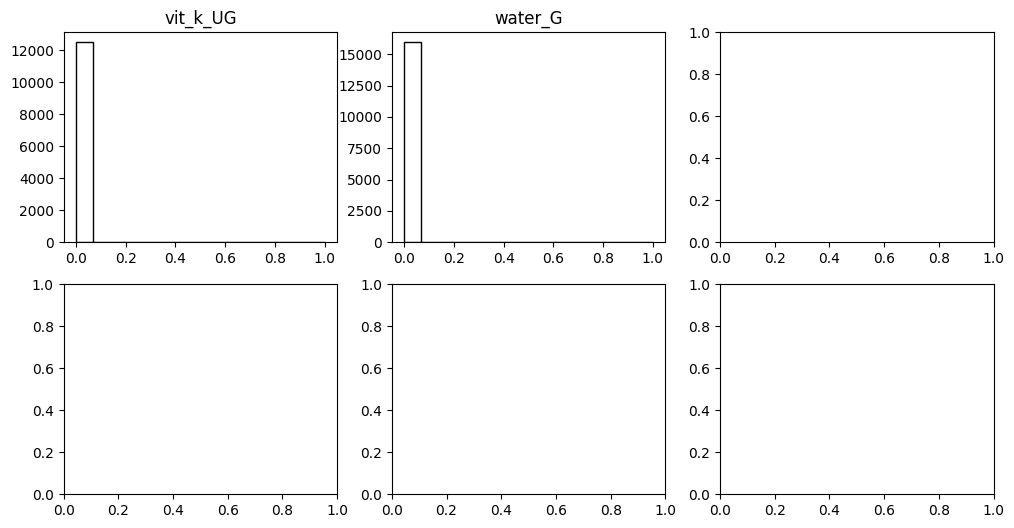

In [37]:
bin = 15
rows = int(len(Col_num)/3)+1
# print(rows, df['ALA_G'].min())

for n in range(rows):
    fig, ax = plt.subplots(2, 3, figsize=(12,6))
    for i in range(2):
        for j , c in enumerate(Col_num[3*(i+n):3*(i+n+1)]):
            d=min_max_scale(df[c])
            ax[i,j].set_title(c)
            ax[i,j].hist(d, 
                    bin, range=(0,1), density=False, 
                    fill=False)
plt.show(fig)
